<a href="https://colab.research.google.com/github/oneoftwo/generative_model_tutorial/blob/main/GAN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generative Adverserial Network (GAN)**

## **Import and Download Dataset**

In [1]:
import numpy as np
import random as random
import time as time
from tqdm import tqdm
from tqdm.notebook import tqdm

import torch
from torch import nn
from torch import optim
from torch.nn import functional as F


from matplotlib import pyplot as plt
from matplotlib import cm

In [2]:
#==============================================================================#
# download dataset ============================================================#
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

from torchvision import datasets, transforms
batch_size = 128
download_root = './MNIST_DATASET'
train_dataset = MNIST(download_root, transform=transforms.ToTensor(), \
        train=True, download=True)
test_dataset = MNIST(download_root, transform=transforms.ToTensor(), \
        train=False, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, \
        shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, \
        shuffle=True, drop_last=True)
#==============================================================================#

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## **Utils**

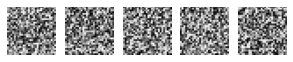

In [3]:
################################################################################
# utils ########################################################################

def plot_sample(x):
        fig = plt.figure(figsize=(5, 25))
        for idx in range(5):
            img = x[idx].cpu().squeeze().detach().numpy()
            ax = fig.add_subplot(1, 5, idx + 1)
            ax.imshow(img, cmap=cm.gray)
            ax.axis('off')
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
        plt.show()

################################################################################


#==============================================================================#
# sanity check ================================================================#
plot_sample(torch.rand(20, 1, 28, 28))
#==============================================================================#

## **Model**
Generative adverserial network

In [31]:
################################################################################
# GAN ##########################################################################

def sampler(batch_size, z_dim):
    z = torch.randn(batch_size, z_dim)
    return z


# GAN generator
class Generator(nn.Module):
    
    def __init__(self, z_dim=2):
        super().__init__()
        self.fc = nn.Sequential(\
                nn.Linear(z_dim, 128), \
                nn.ReLU(), \
                nn.Dropout(0.3), \
                nn.Linear(128, 256), \
                nn.ReLU(), \
                nn.Dropout(0.3), \
                nn.Linear(256, 512), \
                nn.ReLU(), \
                nn.Dropout(0.3), \
                nn.Linear(512, 28 * 28))
        
    def forward(self, z):
        b = z.size(0)
        x = self.fc(z)
        x = x.view(b, 1, 28, 28)
        x = torch.sigmoid(x)
        return x


# GAN discriminaotr, CNN based classifier
class Discriminator(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(\
                nn.Linear(28 * 28, 512), \
                nn.ReLU(), \
                nn.Dropout(0.3), \
                nn.Linear(512, 256), \
                nn.ReLU(), \
                nn.Dropout(0.3), \
                nn.Linear(256, 128), \
                nn.ReLU(), \
                nn.Dropout(0.3), \
                nn.Linear(128, 1))
        
    def forward(self, x):
        b = x.size(0)
        x = x.reshape(b, -1)
        x = self.fc(x)
        x = torch.sigmoid(x).squeeze()
        return x


################################################################################


#==============================================================================#
# sanity check ================================================================#
g = Generator()
d = Discriminator()
z = sampler(32, 2)
print(z.size())
print(g(z).size())
print(d(g(z)).size())
#==============================================================================#

torch.Size([32, 2])
torch.Size([32, 1, 28, 28])
torch.Size([32])


## **Train**

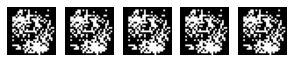

epoch 20
generator loss: 58.803
discriminator loss: 0.027


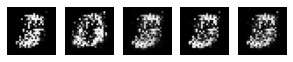

epoch 40
generator loss: 8.857
discriminator loss: 0.085


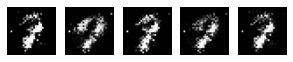

epoch 60
generator loss: 5.599
discriminator loss: 0.255


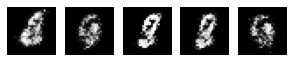

epoch 80
generator loss: 4.065
discriminator loss: 0.307


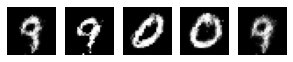

epoch 100
generator loss: 3.270
discriminator loss: 0.407


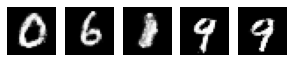

epoch 120
generator loss: 2.312
discriminator loss: 0.574


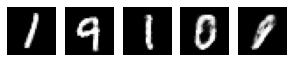

epoch 140
generator loss: 2.056
discriminator loss: 0.635


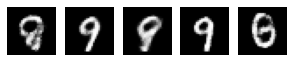

epoch 160
generator loss: 1.928
discriminator loss: 0.669


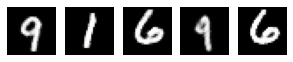

epoch 180
generator loss: 1.888
discriminator loss: 0.685


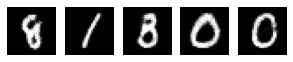

epoch 200
generator loss: 1.879
discriminator loss: 0.693


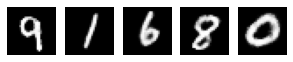

epoch 220
generator loss: 1.894
discriminator loss: 0.692


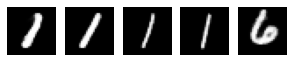

epoch 240
generator loss: 1.926
discriminator loss: 0.688


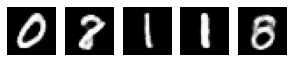

epoch 260
generator loss: 1.951
discriminator loss: 0.684


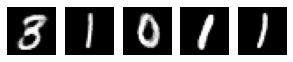

epoch 280
generator loss: 1.993
discriminator loss: 0.668


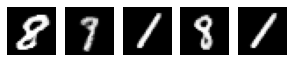

epoch 300
generator loss: 2.048
discriminator loss: 0.651


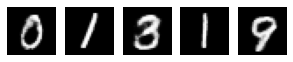

epoch 320
generator loss: 2.072
discriminator loss: 0.646


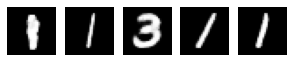

epoch 340
generator loss: 2.129
discriminator loss: 0.635


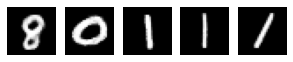

epoch 360
generator loss: 2.191
discriminator loss: 0.629


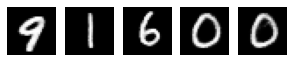

epoch 380
generator loss: 2.242
discriminator loss: 0.614


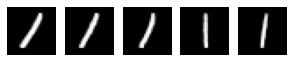

epoch 400
generator loss: 2.302
discriminator loss: 0.600


In [33]:
################################################################################
# train fxn ####################################################################

def train_gan_single_epoch(generator, discriminator, train_loader, z_dim=64):
    generator.cuda().train()
    discriminator.cuda().train()
    g_optimizer = optim.Adam(generator.parameters(), lr=1e-4)
    d_optimizer = optim.Adam(discriminator.parameters(), lr=1e-4)
    criterion = nn.BCELoss(reduction='sum')
    epoch_loss_d, epoch_loss_g = 0, 0
    n_data = 0
    # update parameters
    for img, label in (train_loader):
        img, label = img.cuda(), label.cuda()
        b = img.size(0)
        n_data += img.size(0)
        # update discriminator / to not be faked by generator
        d_optimizer.zero_grad()
        prob_real = discriminator(img)
        prob_fake = discriminator(generator(sampler(b, z_dim).cuda()))
        loss_real = criterion(prob_real, torch.ones(prob_real.size()).cuda())
        loss_fake = criterion(prob_fake, torch.zeros(prob_fake.size()).cuda())
        loss_d = (loss_real + loss_fake)
        loss_d.backward()
        d_optimizer.step()
        epoch_loss_d += loss_d.item()
        # update generator / to fake the discriminaotr
        g_optimizer.zero_grad()
        prob_fake = discriminator(generator(sampler(b, z_dim).cuda()))
        loss_g = criterion(prob_fake, torch.ones(prob_fake.size()).cuda())
        loss_g.backward()
        g_optimizer.step()
        epoch_loss_g += loss_g.item()
    epoch_loss_g = epoch_loss_g / n_data
    epoch_loss_d = epoch_loss_d / n_data
    return generator, discriminator, epoch_loss_g, epoch_loss_d

################################################################################


#==============================================================================#
# train model =================================================================#
g = Generator(z_dim=128)
d = Discriminator()
loss_g_list, loss_d_list = [], []
for epoch_idx in range(1, 401):
    g, d, epoch_loss_g, epoch_loss_d = \
            train_gan_single_epoch(g, d, train_loader, z_dim=128)
    loss_g_list.append(epoch_loss_g)
    loss_d_list.append(epoch_loss_d)
    if epoch_idx % 20 == 0:
        g.eval()
        plot_sample(g(sampler(10, 128).cuda()))
        print('epoch {}'.format(epoch_idx))
        print('generator loss: {:.3f}'.format(epoch_loss_g))
        print('discriminator loss: {:.3f}'.format(epoch_loss_d))
#==============================================================================#

## **Plot Results**

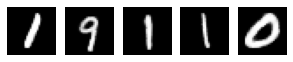

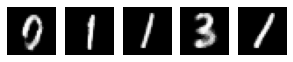

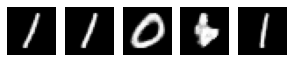

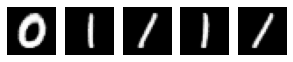

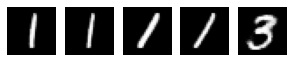

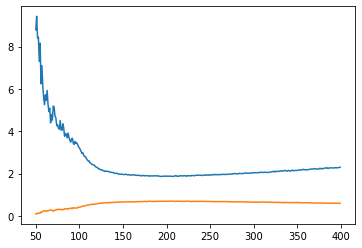

In [46]:
#==============================================================================#
# Plot ========================================================================#
for _ in range(5):
    plot_sample(g(sampler(10, 128).cuda()))
x = 50
plt.plot(range(len(loss_g_list))[x:], loss_g_list[x:])
plt.plot(range(len(loss_d_list))[x:], loss_d_list[x:])
plt.show()
#==============================================================================#